In [1]:
from scipy import special as sp
import numpy as np
import matplotlib.pyplot as plt

from ipynb.fs.full.mie_functions import *

In [2]:
# Import wavelength and refractive index values
ref_lam_silver, ref_n_silver, ref_k_silver = import_data("McPeak_silver.csv")
m_silver = ref_n_silver + 1j * ref_k_silver 
ref_lam_gold, ref_n_gold, ref_k_gold = import_data("McPeak_gold.csv")
m_gold = ref_n_gold + 1j * ref_k_gold 

In [3]:
# Define radii and respective coordinate arrays for plotting
r1 = 0.01 #micrometers
r2 = 0.04 #micrometers
r3 = 0.06 #micrometers
r4 = 0.07 #micrometers

x_arr1 = np.linspace(1.0, 2.0, 100) * r1 * 1e3  #nm
x_arr2 = np.linspace(1.0, 2.0, 100) * r2 * 1e3  #nm
x_arr3 = np.linspace(1.0, 2.0, 100) * r3 * 1e3  #nm
x_arr4 = np.linspace(1.0, 2.0, 100) * r4 * 1e3  #nm

y_arr = np.array([0.0]) #nm

r_arr1 = np.sqrt(x_arr1**2 + np.ones_like(x_arr1)*y_arr[0]**2) #nm
r_arr2 = np.sqrt(x_arr2**2 + np.ones_like(x_arr2)*y_arr[0]**2) #nm
r_arr3 = np.sqrt(x_arr3**2 + np.ones_like(x_arr3)*y_arr[0]**2) #nm
r_arr4 = np.sqrt(x_arr4**2 + np.ones_like(x_arr4)*y_arr[0]**2) #nm

### Finding the resonant wavelength of nanoparticles of three different diameters

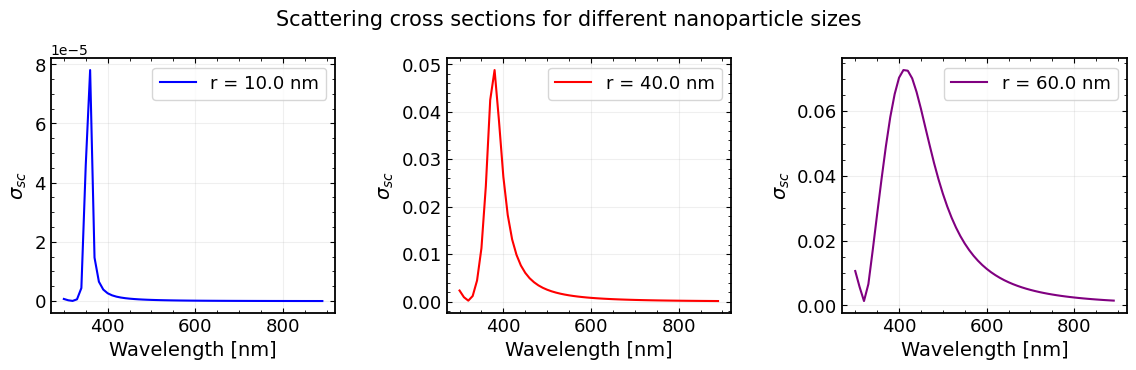

Resonant wavelength for r = 10.0 nm: 360.0 nm
Resonant wavelength for r = 40.0 nm: 380.0 nm
Resonant wavelength for r = 60.0 nm: 410.0 nm
Resonant wavelength for r = 70.0 nm: 440.0 nm


In [4]:
A_r1, B_r1 = a_1_b_1_lists(ref_ind = m_silver, lam_list = ref_lam_silver, r = r1, YSK = True)
A_r2, B_r2 = a_1_b_1_lists(ref_ind = m_silver, lam_list = ref_lam_silver, r = r2, YSK = True)
A_r3, B_r3 = a_1_b_1_lists(ref_ind = m_silver, lam_list = ref_lam_silver, r = r3, YSK = True)
A_r4, B_r4 = a_1_b_1_lists(ref_ind = m_silver, lam_list = ref_lam_silver, r = r4, YSK = True)

sca_cross_section_r1 = sca_cross_section_analytical(A_r1, B_r1, ref_lam_silver) # electric + magnetic dipole
sca_cross_section_r2 = sca_cross_section_analytical(A_r2, B_r2, ref_lam_silver) # only electric dipole
sca_cross_section_r3 = sca_cross_section_analytical(A_r3, B_r3, ref_lam_silver) # only electric dipole
sca_cross_section_r4 = sca_cross_section_analytical(A_r4, B_r4, ref_lam_silver) # only electric dipole

general_plot_style([ref_lam_silver[:60]*1e3, ref_lam_silver[:60]*1e3, ref_lam_silver[:60]*1e3], 
                   [sca_cross_section_r1[:60], sca_cross_section_r2[:60], sca_cross_section_r3[:60]], 
                   legendlabels = [f'r = {r1*1e3} nm', f'r = {r2*1e3} nm', f'r = {r3*1e3} nm'], 
                   colors = ['blue', 'red', 'purple'], ls = ['solid', 'solid', 'solid'], figsize = [12,4],
                   subplots = [1,3], xlabel = 'Wavelength [nm]', ylabel = '$\sigma_{sc}$', 
                   title = 'Scattering cross sections for different nanoparticle sizes', 
                   filename = 'scat_cross_sections.jpg', savefig = True)

lam1 = ref_lam_silver[np.where(sca_cross_section_r1 == np.max(sca_cross_section_r1))][0]
lam2 = ref_lam_silver[np.where(sca_cross_section_r2 == np.max(sca_cross_section_r2))][0]
lam3 = ref_lam_silver[np.where(sca_cross_section_r3 == np.max(sca_cross_section_r3))][0]
lam4 = ref_lam_silver[np.where(sca_cross_section_r4 == np.max(sca_cross_section_r4))][0]

print(f'Resonant wavelength for r = {r1*1e3} nm: {lam1*1e3} nm')
print(f'Resonant wavelength for r = {r2*1e3} nm: {lam2*1e3} nm')
print(f'Resonant wavelength for r = {r3*1e3} nm: {lam3*1e3} nm')
print(f'Resonant wavelength for r = {r4*1e3} nm: {lam4*1e3} nm')

### Maximum field enhancement for nanoparticles of three different diameters

(incident field at resonant wavelength)

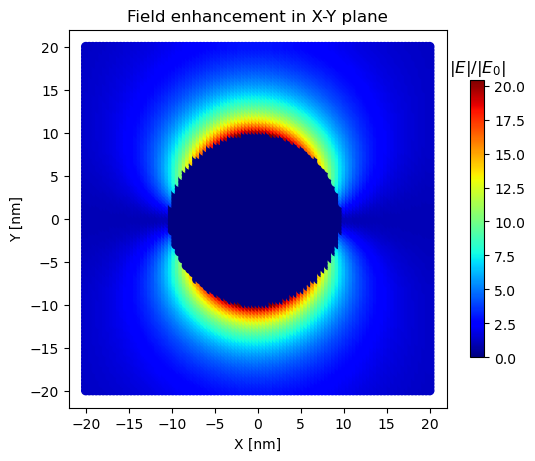

('At incoming wavelength of 360.0 nm',
 'Maximum scattered field = 20.422256542018516 E_0')

In [5]:
# r = 10 nm, resonant wavelength = 360 nm
x_vals = np.linspace(-20.0,20.0,100) #nm
y_vals = np.linspace(-20.0,20.0,100) #nm

plot_scattered_field(x_vals, y_vals, 1e-15, m_silver, lam_list = ref_lam_silver, lam_value = 0.36, r = r1, 
                     filename = 'enhancement_r_10.txt', n = 1, figsize = [6.1,6])

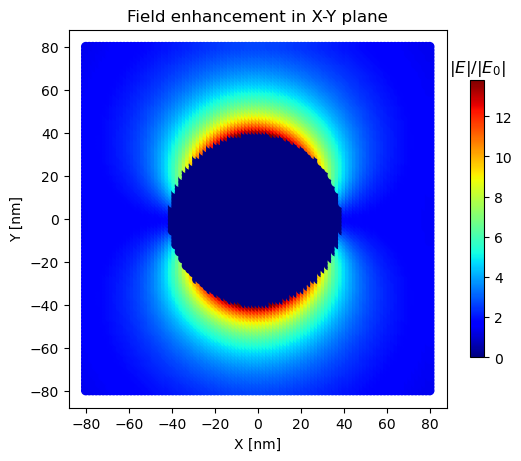

('At incoming wavelength of 380.0 nm',
 'Maximum scattered field = 13.802935960956038 E_0')

In [6]:
# r = 40 nm, resonant wavelength = 380 nm
x_vals = np.linspace(-80.0,80.0,100) #nm
y_vals = np.linspace(-80.0,80.0,100) #nm

plot_scattered_field(x_vals, y_vals, 1e-15, m_silver, lam_list = ref_lam_silver, lam_value = 0.38, r = r2, 
                     filename = 'enhancement_r_40.txt', n = 1, figsize = [6.1,6])

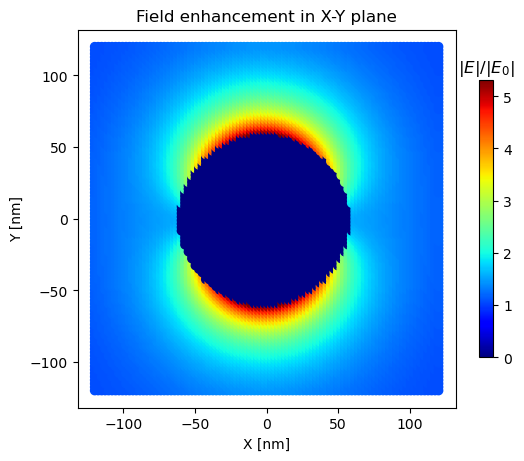

('At incoming wavelength of 410.0 nm',
 'Maximum scattered field = 5.311236421860077 E_0')

In [7]:
# r = 60 nm, resonant wavelength = 410 nm
x_vals = np.linspace(-120.0,120.0,100) #nm
y_vals = np.linspace(-120.0,120.0,100) #nm

plot_scattered_field(x_vals, y_vals, 1e-15, m_silver, lam_list = ref_lam_silver, lam_value = 0.41, r = r3, 
                     filename = 'enhancement_r_60.txt', n = 1, figsize = [6.1,6])

### Rabi frequency and decay rates of the TLS 
(as a function of distance from the surface of the nanosphere)

Max Rabi freq at 11.414 nm for E_0 = 0.011, radius r = 10 nm
Max Rabi freq at 45.657 nm for E_0 = 0.015, radius r = 40 nm
Max Rabi freq at 69.697 nm for E_0 = 0.067, radius r = 60 nm
Max Rabi freq at 79.899 nm for E_0 = 0.041, radius r = 70 nm


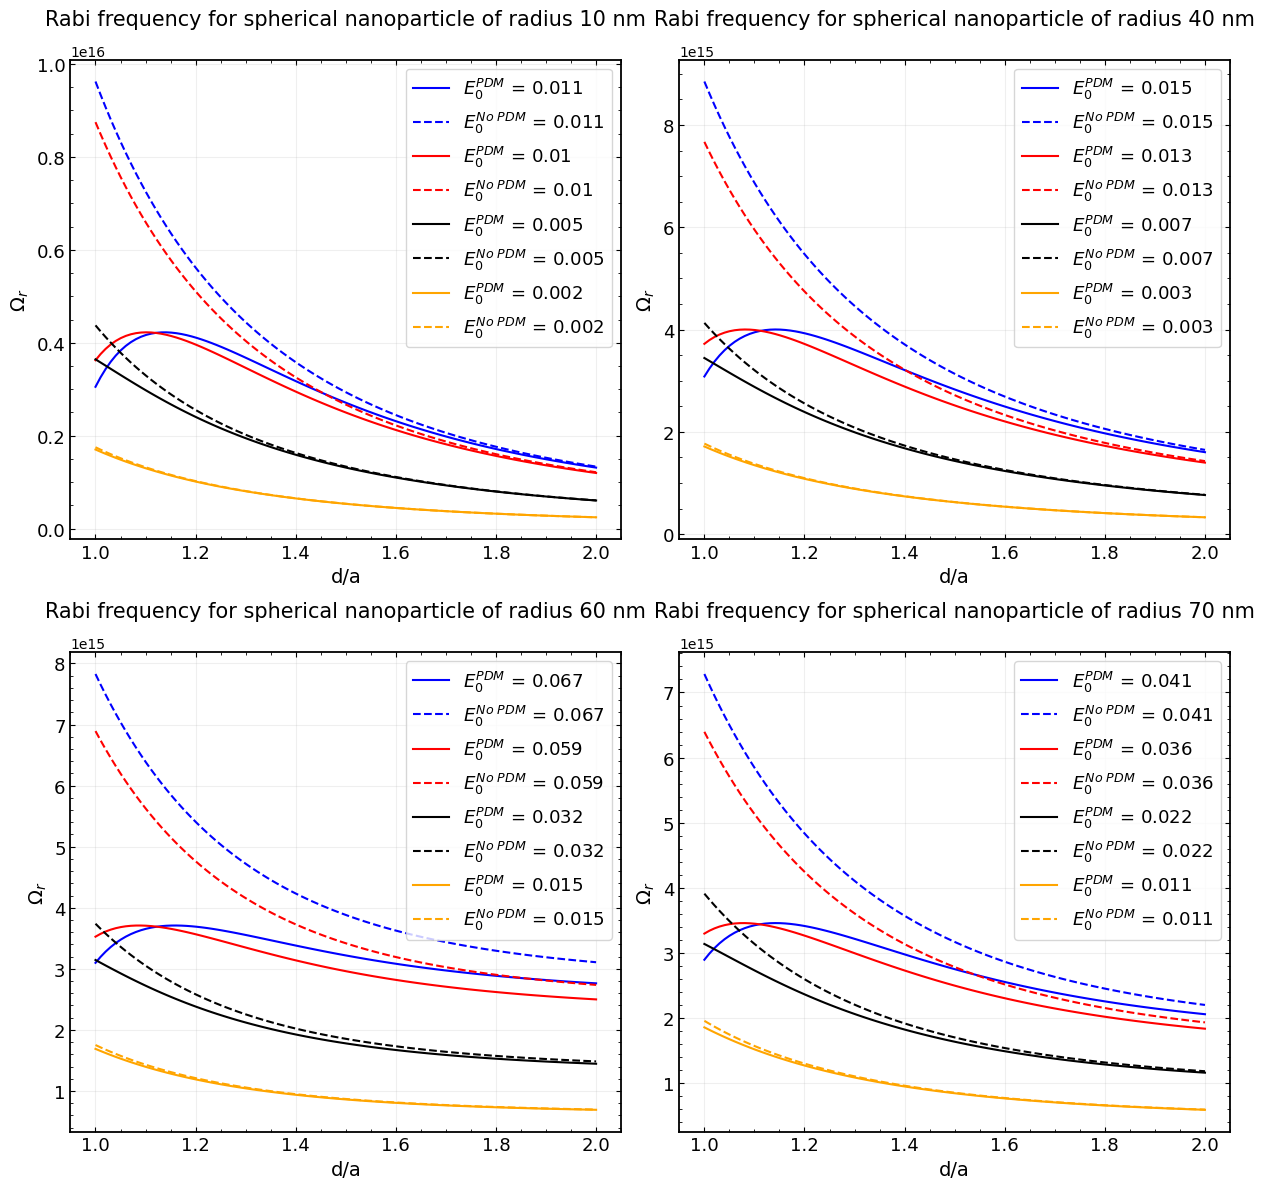

In [8]:
E0s1 = [0.011, 0.010, 0.005, 0.002]
J_factor01, E01, omega_np01, omega01 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r1, 
                                                      n = 1, lam_value = lam1, E_0 = E0s1[0], print_vals = False)
J_factor11, E11, omega_np11, omega11 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r1, 
                                                      n = 1, lam_value = lam1, E_0 = E0s1[1], print_vals = False)
J_factor21, E21, omega_np21, omega21 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r1, 
                                                      n = 1, lam_value = lam1, E_0 = E0s1[2], print_vals = False)
J_factor31, E31, omega_np31, omega31 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r1, 
                                                      n = 1, lam_value = lam1, E_0 = E0s1[3], print_vals = False)
omega1 = [omega01, omega11, omega21, omega31]
omeganp1 = [omega_np01, omega_np11, omega_np21, omega_np31]

E0s2 = [0.015, 0.013, 0.007, 0.003]
J_factor02, E02, omega_np02, omega02 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r2, 
                                                      n = 1, lam_value = lam2, E_0 = E0s2[0], print_vals = False)
J_factor12, E12, omega_np12, omega12 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r2,
                                                      n = 1, lam_value = lam2, E_0 = E0s2[1], print_vals = False)
J_factor22, E22, omega_np22, omega22 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r2, 
                                                      n = 1, lam_value = lam2, E_0 = E0s2[2], print_vals = False)
J_factor32, E32, omega_np32, omega32 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r2, 
                                                      n = 1, lam_value = lam2, E_0 = E0s2[3], print_vals = False)
omega2 = [omega02, omega12, omega22, omega32]
omeganp2 = [omega_np02, omega_np12, omega_np22, omega_np32]

E0s3 = [0.067, 0.059, 0.032, 0.015]
J_factor03, E03, omega_np03, omega03 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r2, 
                                                      n = 1, lam_value = lam3, E_0 = E0s3[0], print_vals = False)
J_factor13, E13, omega_np13, omega13 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r2, 
                                                      n = 1, lam_value = lam3, E_0 = E0s3[1], print_vals = False)
J_factor23, E23, omega_np23, omega23 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r2, 
                                                      n = 1, lam_value = lam3, E_0 = E0s3[2], print_vals = False)
J_factor33, E33, omega_np33, omega33 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r2,
                                                      n = 1, lam_value = lam3, E_0 = E0s3[3], print_vals = False)
omega3 = [omega03, omega13, omega23, omega33]
omeganp3 = [omega_np03, omega_np13, omega_np23, omega_np33]

E0s4 = [0.041, 0.036, 0.022, 0.011]
J_factor04, E04, omega_np04, omega04 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r4, 
                                                      n = 1, lam_value = lam4, E_0 = E0s4[0], print_vals = False)
J_factor14, E14, omega_np14, omega14 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r4, 
                                                      n = 1, lam_value = lam4, E_0 = E0s4[1], print_vals = False)
J_factor24, E24, omega_np24, omega24 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r4, 
                                                      n = 1, lam_value = lam4, E_0 = E0s4[2], print_vals = False)
J_factor34, E34, omega_np34, omega34 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, 
                                                      refr_ind = m_silver, lam_list = ref_lam_silver, r = r4, 
                                                      n = 1, lam_value = lam4, E_0 = E0s4[3], print_vals = False)
omega4 = [omega04, omega14, omega24, omega34]
omeganp4 = [omega_np04, omega_np14, omega_np24, omega_np34]

st1 = '$E_0^{PDM}$'
st2 = '$E_0^{No \,\, PDM}$'
col = ['blue', 'red', 'black', 'orange']
fig, ax = plt.subplots(2,2, figsize = (12.5, 12), layout = 'tight')
for q in range(4):
    ax[0,0].plot(r_arr1/(r1*1e3), omega1[q], label = f'{st1} = {E0s1[q]}', color = col[q], ls = 'solid')
    ax[0,0].plot(r_arr1/(r1*1e3), omeganp1[q], label = f'{st2} = {E0s1[q]}', color = col[q], ls = '--')
    ax[0,1].plot(r_arr2/(r2*1e3), omega2[q], label = f'{st1} = {E0s2[q]}', color = col[q], ls = 'solid')
    ax[0,1].plot(r_arr2/(r2*1e3), omeganp2[q], label = f'{st2} = {E0s2[q]}', color = col[q], ls = '--')
    ax[1,0].plot(r_arr3/(r3*1e3), omega3[q], label = f'{st1} = {E0s3[q]}', color = col[q], ls = 'solid')
    ax[1,0].plot(r_arr3/(r3*1e3), omeganp3[q], label = f'{st2} = {E0s3[q]}', color = col[q], ls = '--')
    ax[1,1].plot(r_arr4/(r4*1e3), omega4[q], label = f'{st1} = {E0s4[q]}', color = col[q], ls = 'solid')
    ax[1,1].plot(r_arr4/(r4*1e3), omeganp4[q], label = f'{st2} = {E0s4[q]}', color = col[q], ls = '--') 
    
for v in range(2):
    for w in range(2):
        ax[v,w].set_xlabel('d/a', fontsize=14)
        ax[v,w].set_ylabel('$\Omega_r$', fontsize=14)
        ax[v,w].minorticks_on()
        ax[v,w].tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=13)
        for axis in ['top','bottom','left','right']:
            ax[v,w].spines[axis].set_linewidth(1.3)
        ax[v,w].grid(alpha = 0.2)
        ax[v,w].legend(fontsize=13)
ax[0,0].set_title(f'Rabi frequency for spherical nanoparticle of radius {r1*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
ax[0,1].set_title(f'Rabi frequency for spherical nanoparticle of radius {r2*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
ax[1,0].set_title(f'Rabi frequency for spherical nanoparticle of radius {r3*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
ax[1,1].set_title(f'Rabi frequency for spherical nanoparticle of radius {r4*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)

d_1 = r_arr1[np.where(omega01 == np.max(omega01))]
d_2 = r_arr2[np.where(omega02 == np.max(omega02))]
d_3 = r_arr3[np.where(omega03 == np.max(omega03))]
d_4 = r_arr4[np.where(omega04 == np.max(omega04))]
print(f'Max Rabi freq at {d_1[0]:.3f} nm for E_0 = {E0s1[0]}, radius r = {r1*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_2[0]:.3f} nm for E_0 = {E0s2[0]}, radius r = {r2*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_3[0]:.3f} nm for E_0 = {E0s3[0]}, radius r = {r3*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_4[0]:.3f} nm for E_0 = {E0s4[0]}, radius r = {r4*1e3:.0f} nm' )

Max Rabi freq at 11.010 nm for E_0 = 0.0001, d_ii = 100, radius r = 10 nm
Max Rabi freq at 50.909 nm for E_0 = 0.0001, d_ii = 200, radius r = 40 nm
Max Rabi freq at 80.606 nm for E_0 = 0.0001, d_ii = 500, radius r = 60 nm
Max Rabi freq at 96.162 nm for E_0 = 0.0001, d_ii = 600, radius r = 70 nm


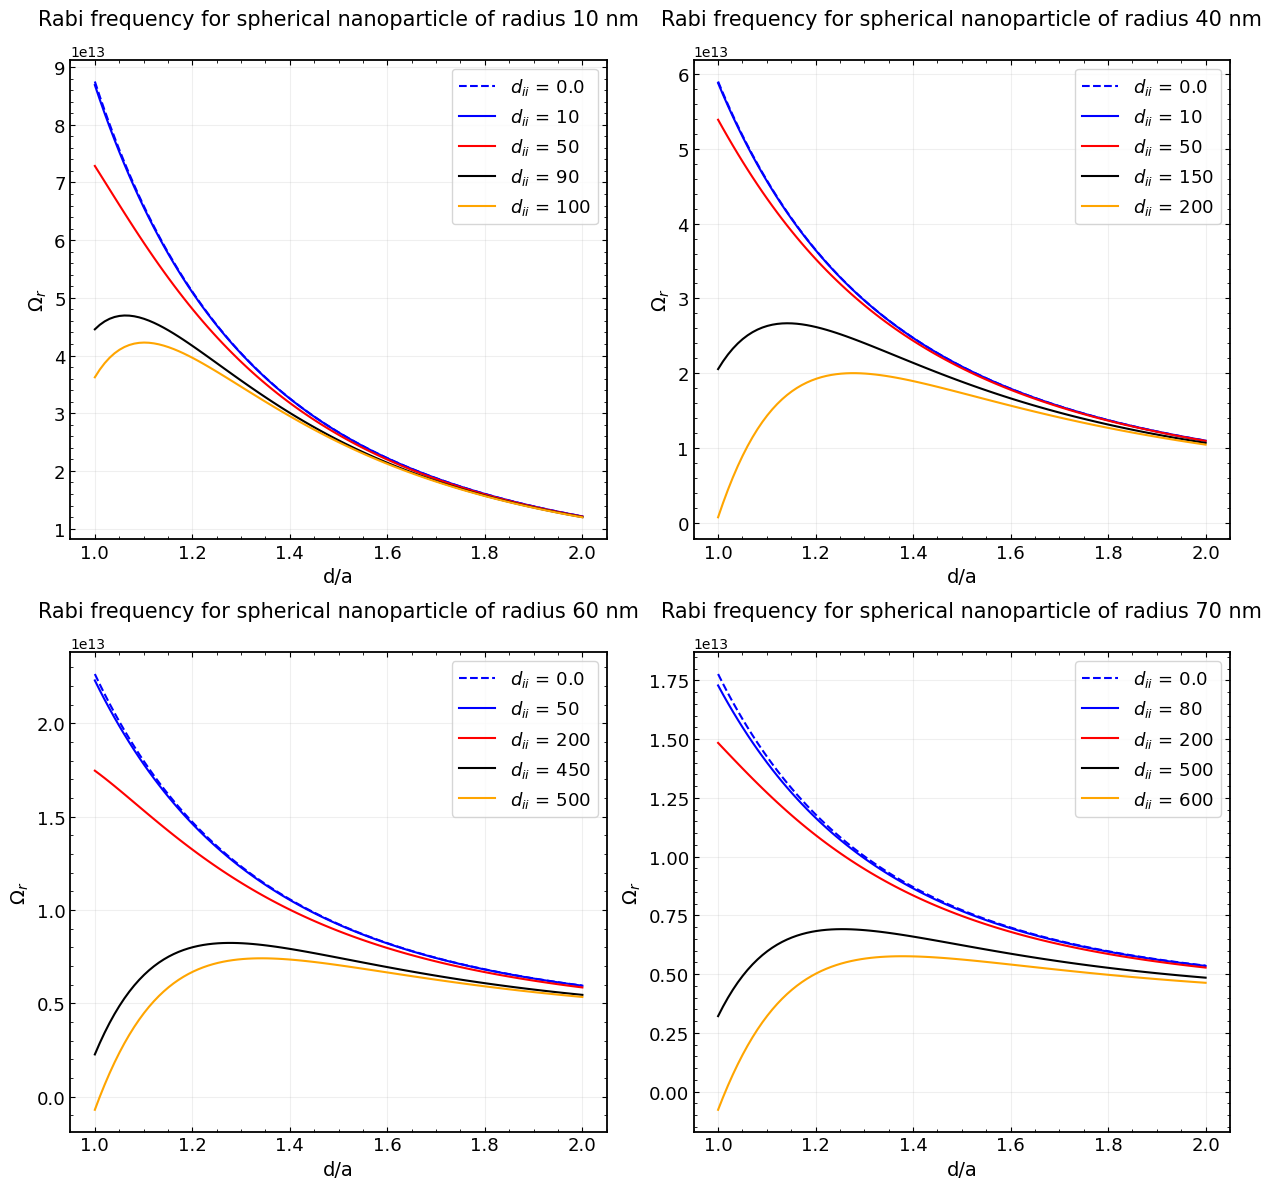

In [9]:
d_ii_1 = [0.0, 10, 50, 90, 100]
E_0_fixed = 0.0001
# r = 10 nm
J_factor05, E05, omega_np05, omega05 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_1[1], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r1, n = 1, lam_value = lam1, E_0 = E_0_fixed)
J_factor15, E15, omega_np15, omega15 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_1[2], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r1, n = 1, lam_value = lam1, E_0 = E_0_fixed)
J_factor25, E25, omega_np25, omega25 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_1[3], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r1, n = 1, lam_value = lam1, E_0 = E_0_fixed)
J_factor35, E35, omega_np35, omega35 = rabi_frequency(x_points = x_arr1, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_1[4], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r1, n = 1, lam_value = lam1, E_0 = E_0_fixed)
omega5 = [omega_np05, omega05, omega15, omega25, omega35]

# r = 40 nm
d_ii_2 = [0.0, 10, 50, 150, 200]
J_factor06, E06, omega_np06, omega06 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_2[1], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r2, n = 1, lam_value = lam2, E_0 = E_0_fixed)
J_factor16, E16, omega_np16, omega16 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_2[2], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r2, n = 1, lam_value = lam2, E_0 = E_0_fixed)
J_factor26, E26, omega_np26, omega26 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_2[3], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r2, n = 1, lam_value = lam2, E_0 = E_0_fixed)
J_factor36, E36, omega_np36, omega36 = rabi_frequency(x_points = x_arr2, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_2[4], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r2, n = 1, lam_value = lam2, E_0 = E_0_fixed)
omega6 = [omega_np06, omega06, omega16, omega26, omega36]

# r = 40 nm
d_ii_3 = [0.0, 50, 200, 450, 500]
J_factor07, E07, omega_np07, omega07 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_3[1], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r3, n = 1, lam_value = lam3, E_0 = E_0_fixed)
J_factor17, E17, omega_np17, omega17 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_3[2], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r3, n = 1, lam_value = lam3, E_0 = E_0_fixed)
J_factor27, E27, omega_np27, omega27 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_3[3], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r3, n = 1, lam_value = lam3, E_0 = E_0_fixed)
J_factor37, E37, omega_np37, omega37 = rabi_frequency(x_points = x_arr3, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_3[4], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r3, n = 1, lam_value = lam3, E_0 = E_0_fixed)
omega7 = [omega_np07, omega07, omega17, omega27, omega37]

# r = 40 nm
d_ii_4 = [0.0, 80, 200, 500, 600]
J_factor08, E08, omega_np08, omega08 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_4[1], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r4, n = 1, lam_value = lam4, E_0 = E_0_fixed)
J_factor18, E18, omega_np18, omega18 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_4[2], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r4, n = 1, lam_value = lam4, E_0 = E_0_fixed)
J_factor28, E28, omega_np28, omega28 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_4[3], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r4, n = 1, lam_value = lam4, E_0 = E_0_fixed)
J_factor38, E38, omega_np38, omega38 = rabi_frequency(x_points = x_arr4, y = y_arr[0], z = 1e-15, dperm = \
                                                      d_ii_4[4], refr_ind = m_silver, lam_list = ref_lam_silver, 
                                                      r = r4, n = 1, lam_value = lam4, E_0 = E_0_fixed,)
omega8 = [omega_np08, omega08, omega18, omega28, omega38]

st = '$d_{ii}$'
fig, ax = plt.subplots(2,2, figsize = (12.5, 12), layout = 'tight')
lss = ['--', 'solid', 'solid', 'solid', 'solid']
col2 = ['blue', 'blue', 'red', 'black', 'orange']
for q in range(5):
    ax[0,0].plot(r_arr1/(r1*1e3), omega5[q], label = f'{st} = {d_ii_1[q]}', color = col2[q], ls = lss[q])
    ax[0,1].plot(r_arr2/(r2*1e3), omega6[q], label = f'{st} = {d_ii_2[q]}', color = col2[q], ls = lss[q])
    ax[1,0].plot(r_arr3/(r3*1e3), omega7[q], label = f'{st} = {d_ii_3[q]}', color = col2[q], ls = lss[q])
    ax[1,1].plot(r_arr4/(r4*1e3), omega8[q], label = f'{st} = {d_ii_4[q]}', color = col2[q], ls = lss[q])
    
for v in range(2):
    for w in range(2):
        ax[v,w].set_xlabel('d/a', fontsize=14)
        ax[v,w].set_ylabel('$\Omega_r$', fontsize=14)
        ax[v,w].minorticks_on()
        ax[v,w].tick_params(axis="both", direction="in", which="both", right=True, top=True, labelsize=13)
        for axis in ['top','bottom','left','right']:
            ax[v,w].spines[axis].set_linewidth(1.3)
        ax[v,w].grid(alpha = 0.2)
        ax[v,w].legend(fontsize=13)
ax[0,0].set_title(f'Rabi frequency for spherical nanoparticle of radius {r1*1e3:.0f} nm', fontsize=15, \
                  wrap = True, pad = 25)
ax[0,1].set_title(f'Rabi frequency for spherical nanoparticle of radius {r2*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)
ax[1,0].set_title(f'Rabi frequency for spherical nanoparticle of radius {r3*1e3:.0f} nm', fontsize=15, \
                  wrap = True, pad = 25)
ax[1,1].set_title(f'Rabi frequency for spherical nanoparticle of radius {r4*1e3:.0f} nm', fontsize=15, \
                  wrap = False, pad = 25)

d_5 = r_arr1[np.where(omega35 == np.max(omega35))]
d_6 = r_arr2[np.where(omega36 == np.max(omega36))]
d_7 = r_arr3[np.where(omega37 == np.max(omega37))]
d_8 = r_arr4[np.where(omega38 == np.max(omega38))]
print(f'Max Rabi freq at {d_5[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_1[-1]}, radius r = {r1*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_6[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_2[-1]}, radius r = {r2*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_7[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_3[-1]}, radius r = {r3*1e3:.0f} nm' )
print(f'Max Rabi freq at {d_8[0]:.3f} nm for E_0 = {E_0_fixed}, d_ii = {d_ii_4[-1]}, radius r = {r4*1e3:.0f} nm' )

### Change of the Rabi frequency of the TLS as a function of distance and incident field

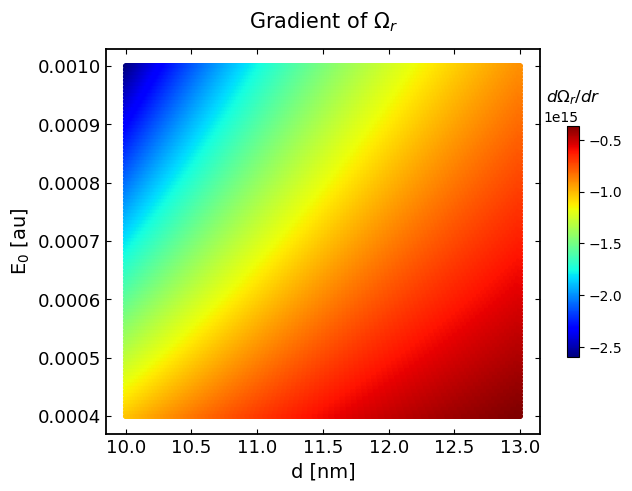

In [10]:
x_arr = np.linspace(1.0, 1.3, 1000) * r1 * 1e3  #nm
rabi_colorbar(x_points = x_arr, y = y_arr[0], z = 1e-15, dperm = 50.0, refr_ind = m_silver, 
              lam_list = ref_lam_silver, 
              r = r1, n = 1, lam_value = 0.36, correction = False)

### Evolution of the TLS

#### Original Hamiltonian

capi_return is NULL
Call-back cb_f_in_zvode__user__routines failed.


KeyboardInterrupt: 

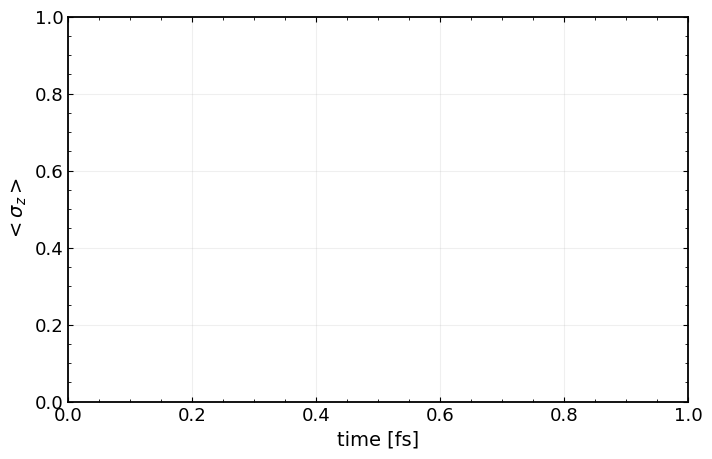

In [11]:
qutip_integration(m_silver, ref_lam_silver, d_tr = 1, d_perm = 0.0, x_points = np.array([30.4*(10**-9), \
                  30.6*(10**-9)]), E_0 = 0.0001, tf = 10000e-15, transformed_H = False)

In [ ]:
qutip_integration(m_silver, ref_lam_silver, x_points = np.array([30.4*(10**-9)]), E_0 = 0.01, tf = 10e-15)

#### Transformed Hamiltonian

In [ ]:
qutip_integration(m_silver, ref_lam_silver, x_points = np.array([10.8*1e-9, 10.9*1e-9]), d_perm = 0.0, \
                  E_0 = 0.0006, r = 0.01, lam_val = 0.36, tf = 1e-12, transformed_H = True)

Omega 67499.29326054631 Delta 217.69775094500002 4134.137336055725
Omega 69163.30110353406 Delta 228.563877343 4134.137336055725


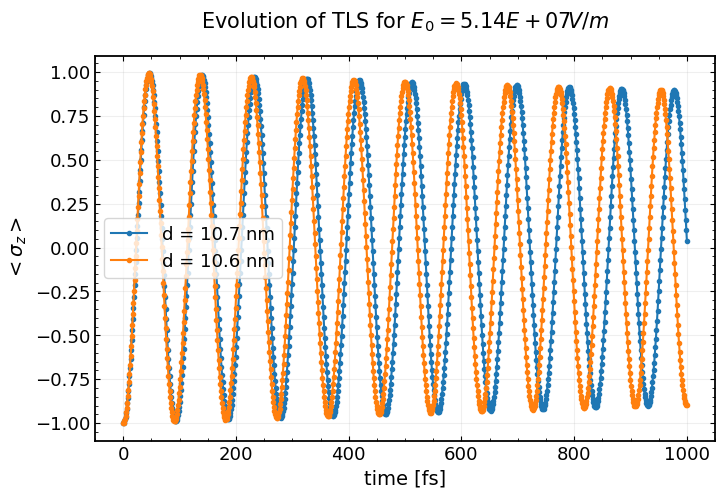

In [12]:
qutip_integration(m_silver, ref_lam_silver, x_points = np.array([10.7*1e-9, 10.6*1e-9]), d_perm = 50.0, \
                  E_0 = 0.0001, r = 0.01, lam_val = 0.36, tf = 1e-12, transformed_H = True)

Omega -17003.974910207784 Delta 14.582262208000001 4134.137336055725
Omega -16875.8028415263 Delta 14.363254762 4134.137336055725


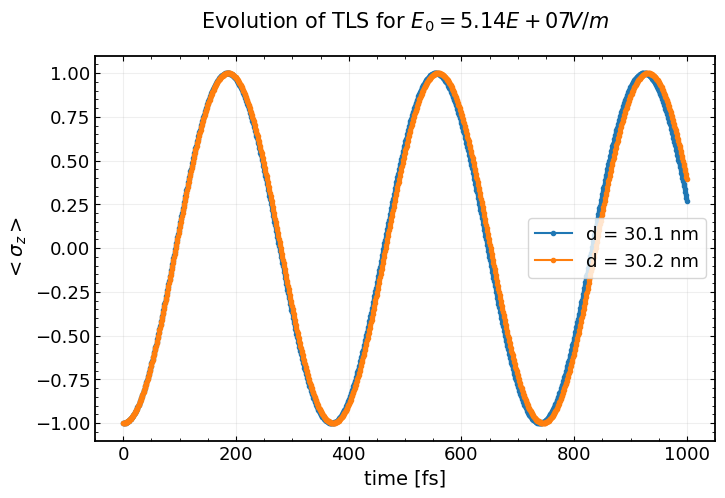

In [13]:
qutip_integration(m_silver, ref_lam_silver, x_points = np.array([30.1*1e-9, 30.2*1e-9]), d_perm = 200.0, \
                  E_0 = 0.0001, r = 0.04, lam_val = 0.38, tf = 1e-12, transformed_H = True)